<a href="https://colab.research.google.com/github/brenocavi/Portfolio/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

No porjeto, será tratado problema de fraude em cartões de créditos, problema que teve um crecimento no pais, principalmente durante período de isolamento onde o número de compras online aumentaram. Segundo dados apontados na [InfoMoney](https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/), somente no primeiro semestre de 2021 houve um aumento de 32,7% nas tentativas de fraude.

Em dados totais, estima-se que cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude, o que totaliza valores superiores a R$ 1,8 milhões por ano. Por conta disso, é necesário que haja melhorias na área de detecção de fraudes. Nessa parte, para analisara grande quantidade de dados geradas por todas as transações, é que entra a Inteligência Artificial. 

O objetivo é detectar e barrar todas o número de transações suspeitas, as vezes ocorre de alguma compra sua que seja fora do seu padrão ser classificada erroneamente como fraude, mas, nesses casos é preferivel pecar pelo execesso. Com o constante trabalho de aprimoramento, os modelos de Machine Learning têm consegui performar cada vez melhor.. 

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/vista-frontal-do-hacker-masculino-segurando-o-smartphone-e-cartao-de-credito_23-2148578146.jpg?w=740&t=st=1669661732~exp=1669662332~hmac=f84e9211e7fdbebb9b4fb7c843597b83d7f6174cef74a1e56b9e2ee091210d18" width="60%"></p>



## Importando os Dados

Os dados utilizados nesse projeto podem ser encontrados [aqui](https://www.kaggle.com/mlg-ulb/creditcardfraud). Os dados são representativos de dois dias de transações realizados por diversas empresas europeas de cartão de crédito, com total de 290 mil transações sendo 492 classificadas como fraude (**0,17%** do total). 


O Dataset possui as seguites variáveis:

**V1 ... V28**: Variáveis numéricas;

**Amount**: Valor gasto em cadas transação;

**Time**: Tempo entre cada transação 

**Class**: Classificação da transação (0: Nomal, 1: Fraude)



As *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$. 

Os dados dessas *features* foram tratados pelo metodo [PCA](https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e). Esse método visa reduzir a dimensionalidade dos dados, ou seja reduzir quantidade de *features* e dados, mas mantendo o maximo de informações possíveis dos dados originais. 


In [ ]:
# importar os pacotes necessários
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe

df=pd.read_csv(file_path)

print('O DataSet possui {} entradas\n\n'.format(df.shape[0]))
df.head()

O DataSet possui 284807 entradas




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Feito a importação dos dados para a variável *df*, podemos iniciar a ánalise explorátorio dos dados e realizar possiíveis ajustes que forem necessários. O objetivo principal desta etapa é entender como está a distribuição estatíticas dos dados, para prepara-los e usa-los no modelo de classificação. 

Os [modelos de classificação](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623) são utilizados em situações, em que,  é necessário prever uma ou mais classes. Neste projeto, por se tratar de um problema binário, ou seja, a transação bancária só pode ser classificada como normal ou fraudulenta, foi usado modelo de Regressão Logistica.


Então, vamos à Análise Exploratória.

## Análise Exploratória


Com o Dataset carregado começamos tentar entender como os dado são estruturados.


Os primeiros passos da análise, vemos que o Dataset é composto apenas por váriaveis númericas, com a execessão da coluna *class*. Os valores dessa última coluna, por ser o alvo da previsão, obrigatoriamente não podem ser valores númericos. Além disso, não existe nenhum dado ausente, não havendo assim, uma necessidade de tratar dados faltantes para utilização do conjunto no modelo, uma vez que modelos de Machine Learning não lidam com dados ausente.

In [ ]:
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Olhando para o resumo estatísitico as variáveis *Time* e *Amount*, que não passaram pelo processo de PCA, são as que possuem valores com distribuição mais desequilibrada, principalemente *Amount* que valor do q3 em 77 e valor máximo em 25961, claramente existem muito outliers 

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No gráfico a seguir é possível visualizar a discrepancia, já dita na página oficial dos dados, entre a quantidade de classificações, possuindo apenas **0,17 %** da classe que queremos prever no modelo. Aqui já encontramos algo que deverá tratado na próxima etapa, sendo necessário realizar um balanceamento dos para que o modelo consiga se "comportar" adequadamente. 

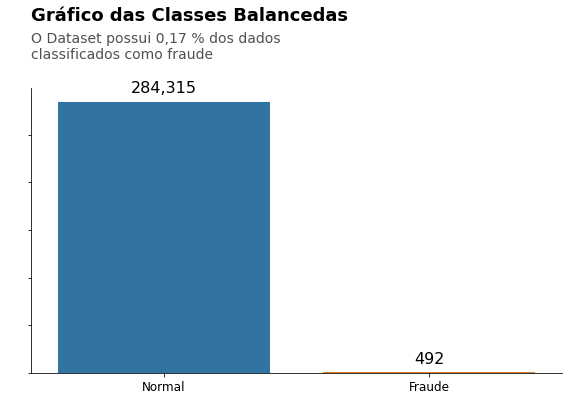

In [ ]:
#configuração da figura
fig,ax = plt.subplots(figsize=(8,6))

sns.countplot(data=df, x='Class')

#retirar margem
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#retirar label
ax.set_xlabel(' ')
ax.set_ylabel(' ')

#configura nome de barra
ax.set_xticklabels(labels=['Normal', 'Fraude'], fontsize = 12)
ax.set_yticklabels(labels=[' '])

#título e subtítulo
ax.text(-0.5, 370000, 'Gráfico das Classes Balancedas', fontsize=18, fontweight='bold')
ax.text(-0.5, 330000, 'O Dataset possui 0,17 % dos dados\nclassificados como fraude', fontsize=14, color ="#515151")

#valor de cada classe
for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 10000 ,
          '{:,}'.format(int(hist.get_height())),
          ha = 'center',
          fontsize=16 )


fig.tight_layout()

Temos duas variáveis que não foram alteradas pelo método PCA. Por disso, é interessente ver como os dados do *Class*, que são o alvo do modelo, estão distribuidos. 

Os hitstogramas abaixo demonstra a distribuição dos dados presentes na coluna *Time* separada por cada classificação, porém, não fica claro nenhuma relação constrastante de "comportamento" entre as duas distribuições para ajudar a identificar de forma mais fácil as transações fradulentas.

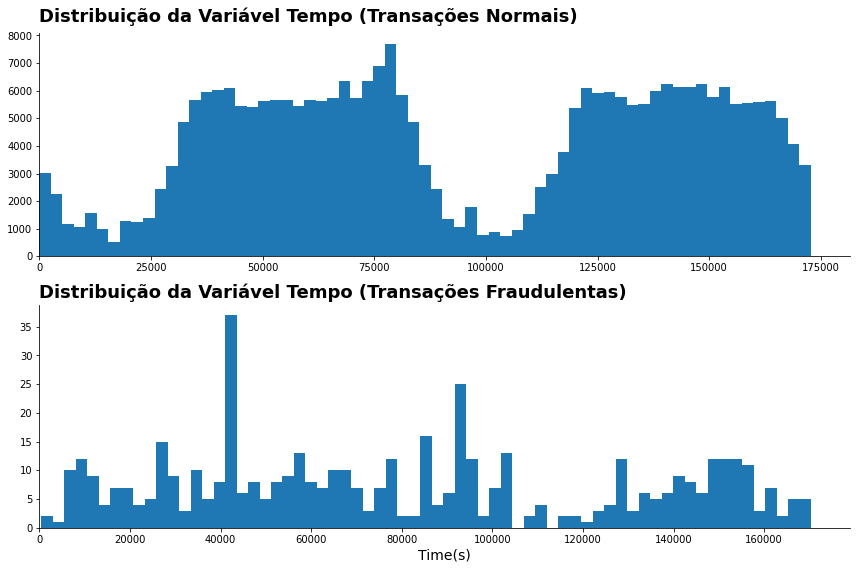

In [ ]:
#Configurando o plot 
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(12,8))

# Método Freedman-Diaconis para definir quantidade de bins adequada
q1 = df.Time.quantile(0.25)
q3 = df.Time.quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df.Time) ** (1 / 3))
bin_count = int(np.ceil((df.Time.max() - df.Time.min()) / bin_width))

#plot dos axis 0
ax[0].hist(df.Time[df.Class == 0], bins = bin_count)
ax[0].text(-5, 8500, 'Distribuição da Variável Tempo (Transações Normais)', fontsize=18, fontweight='bold')

#retirar margem
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].set_xlim(left=0)

#plot do axis 1
ax[1].hist(df.Time[df.Class == 1], bins = bin_count)
ax[1].text(-20, 40 ,'Distribuição da Variável Tempo (Transações Fraudulentas)', fontsize=18, fontweight='bold')

#retirar margem
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[1].set_xlabel('Time(s)', fontsize=14)
ax[1].set_xlim(left=0)

plt.tight_layout()

Para visualizar a relação na variável *Amount*, foi plotado um boxplot como vemos a seguir. A distribuição das classes em relação a esta variável apresenta uma pequena divergência, sendo a fraude melhor distribuida. Essa diferença poode ser útil para a detecção no modelo. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


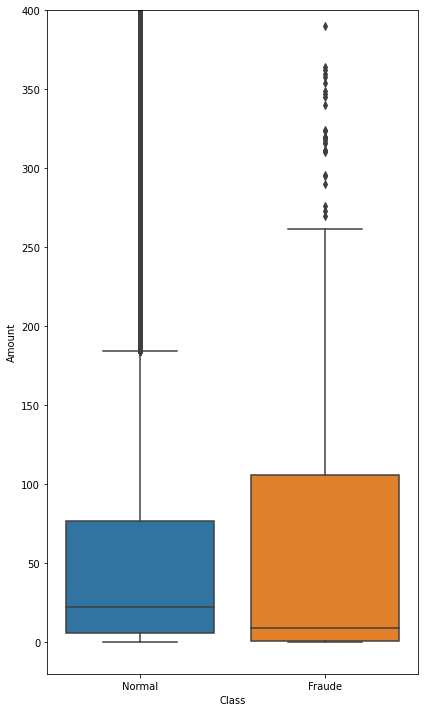

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount,  ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

Nos gráfico a seguir, é apresentado curvas de distruibuição de ambas as classes em relação as *features*. Nessa caso, as *features* que pode ser mais importantes para o modelo, são aquelas que apresentam uma distribução diferente entre as classes, quanto maior a diferença melhor. Com isso em mente, as *features* V3, V4, v10, V11 e V12.

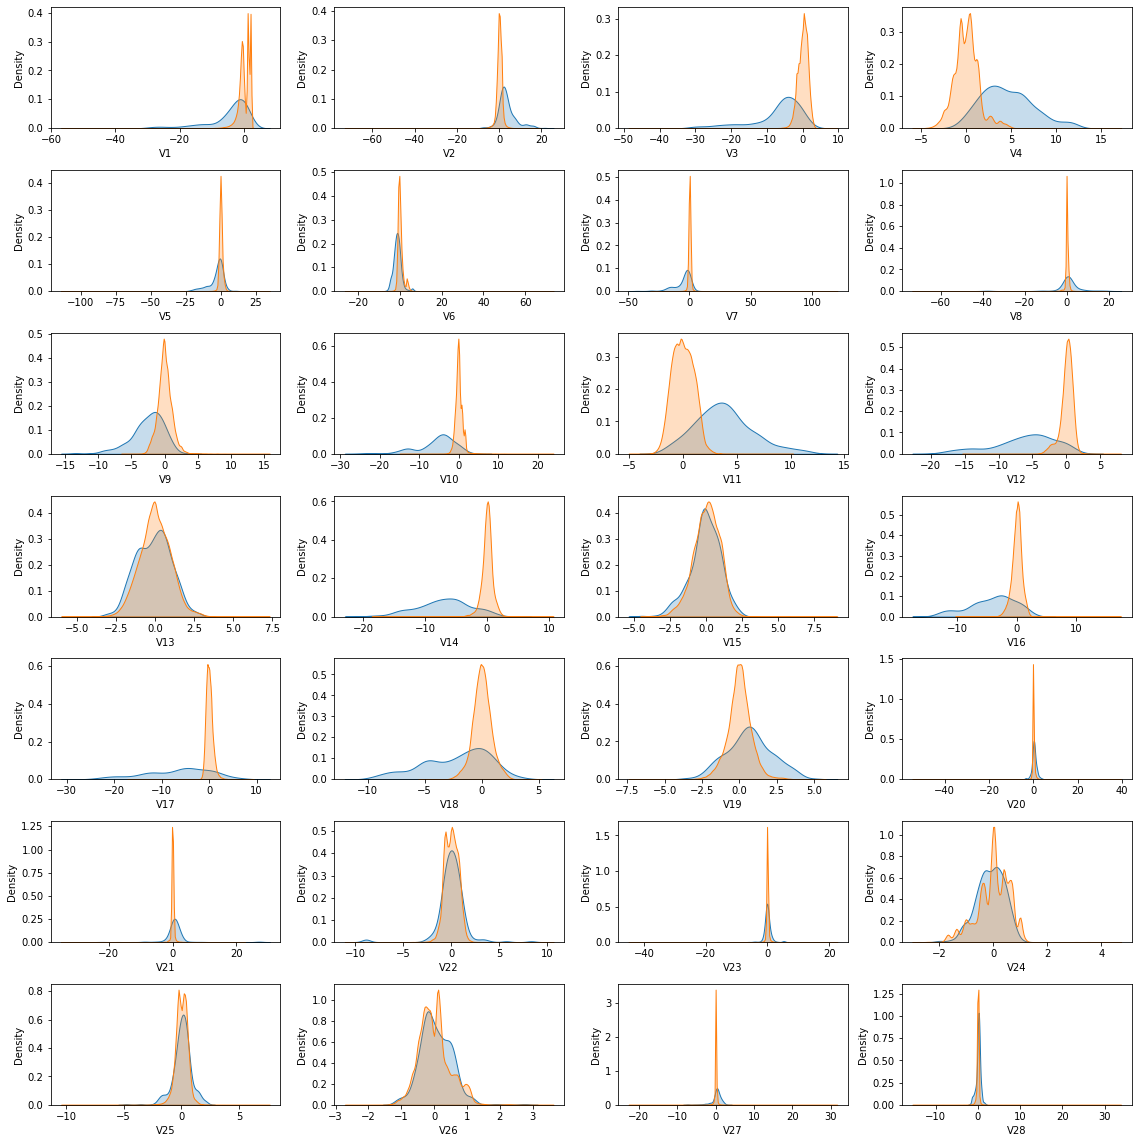

In [ ]:
fautures = df.drop(['Amount', 'Time', 'Class'], axis = 1).columns

fraud = df[df.Class == 1]
normal = df[df.Class == 0]

fig, ax = plt.subplots(nrows= 7, ncols = 4, figsize=(16,16))
fig.subplots_adjust(hspace = 1, wspace = 1)

id = 0
for fauture in fautures:
  id +=1
  plt.subplot(7 ,4 , id)
  sns.kdeplot(fraud[fauture], label = 'Class-1', fill = True)
  sns.kdeplot(normal[fauture], label='Class-0', fill= True)

plt.tight_layout()

## Preparação dos Dados



Finalizado a etapa de exploração dos dados, já temos uma ideia da distruibção dos dados. Alguns pontos importantes são:
 
*   Existe um distinção mais clara de distribuição das classes, apenas em 4 *features*;


*   A variável *Time* não apresenta informções relevantes que possam ser úteis na detecção 
*   A variável *Amount* apresenta uma diferença de distribuição entre as classes, e possui alguns outliers. 







Antes iniciar o treino do modelo é necessario preparar o daods. A primeira etapa a ser realizada é o processo de normatização dos dados, referentes as colunas *Time* e *Amount*, os quais não haviam sido normatizados e estão em escaladas de grandeza diferente. Essa etapa é empregada, com a finalidade de deixar os dados em um escala de grandeza aproximada.

Devido a presença de outliers na variável *Amount*, decidi utilizar o método [**Robust Scaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust+scaler#sklearn.preprocessing.RobustScaler). Método presente na parte de *preprocessing* da biblioteca Scikit Learn, lida melhor com conjunto de dados que possuem outliers.

In [ ]:
df_clean = df.copy()

#instanciando o método
robust = RobustScaler()

#aplicando a redução de demiensionalidade
df_clean['std_Amount'] = robust.fit_transform(df['Amount'].values.reshape(-1,1))
df_clean['std_Time'] = robust.fit_transform(df['Time'].values.reshape(-1,1))

#Retirar as colunas originais
df_clean.drop(['Amount', 'Time'], axis=1, inplace=True)

In [ ]:
df_clean.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount,std_Time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727,0.927124,0.118914
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,3.495006,0.557903
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-0.307413,-0.994983
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-0.229162,-0.358210
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,0.770838,0.641790
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,358.683155,1.035022


Com os dados normatizados, o proximo passo é sapara-los entre treino e teste. Além disso é criado a variável X, onde estaram apenas as *features*, e a variável y, onde estaram os os alvos de classificação. 

O parâmetro *stratify* foi utilizado para garantir, que proporcionalemente, o conjunto de treino e teste tenham as mesmas quantidades de classes.

In [ ]:
#separação do conjunto 
X= df_clean.drop('Class', axis = 1)
y = df_clean['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y , stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df_clean.shape)

(213605, 30)
(71202, 30)
(213605,)
(71202,)
(284807, 31)


O ultimo passo desta etapa é realizar o balanceamento dados, já que o Dataset possui uma quantidade muito maior de transações normais. Esse processo é necessário para que o modelo, consiga performar bem analisando os dois tipo de classificações que temos aqui. 

Para realizar esse balanceamento temos duas opções atraves da biblioteca Imbalanced Learn:

**Under-sampling**: por esse processo as classes são balanceadas, reduzindo a quantidade de amostras da amostra mais numerosa.

**Over-sampling**: é criado a partir do dados já existentes, novas amostras na classe menos numerosa.

Para essa etapa do projeto foi aplicado Under-sampling nas amostra.

In [ ]:
#balanceamento das classes
rus = RandomUnderSampler()
X_resampled, y_resampled =  rus.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

0    369
1    369
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


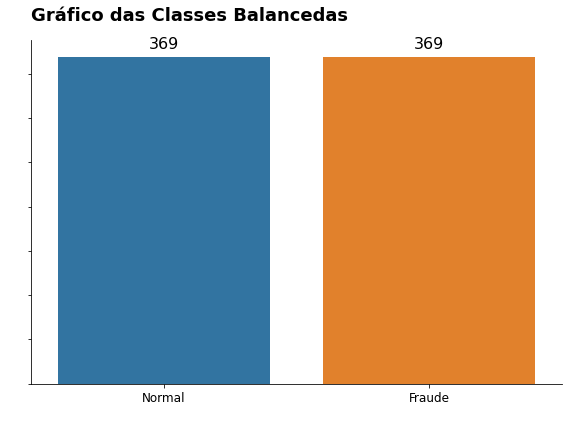

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))

sns.countplot(y_resampled)

#Configurando Fechamento da Imagem
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Configurando Labels
ax.set_xlabel(' ')
ax.set_ylabel(' ')

#Configurando tickers
ax.set_xticklabels(labels=['Normal', 'Fraude'], fontsize = 12)
ax.set_yticklabels(labels=[' '])

#Título
ax.text(-0.5, 410, 'Gráfico das Classes Balancedas', fontsize=18, fontweight='bold')

#Número de cada classe
for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 10 ,
          '{:,}'.format(int(hist.get_height())),
          ha = 'center',
          fontsize=16 )


fig.tight_layout()

A matrix de correlação para os dados não balanceados não traz informações claras, já quando olhamos para a matrix com dados balanceados é possivel ver algumas correlações mais expressivas entre algumas *features*. 

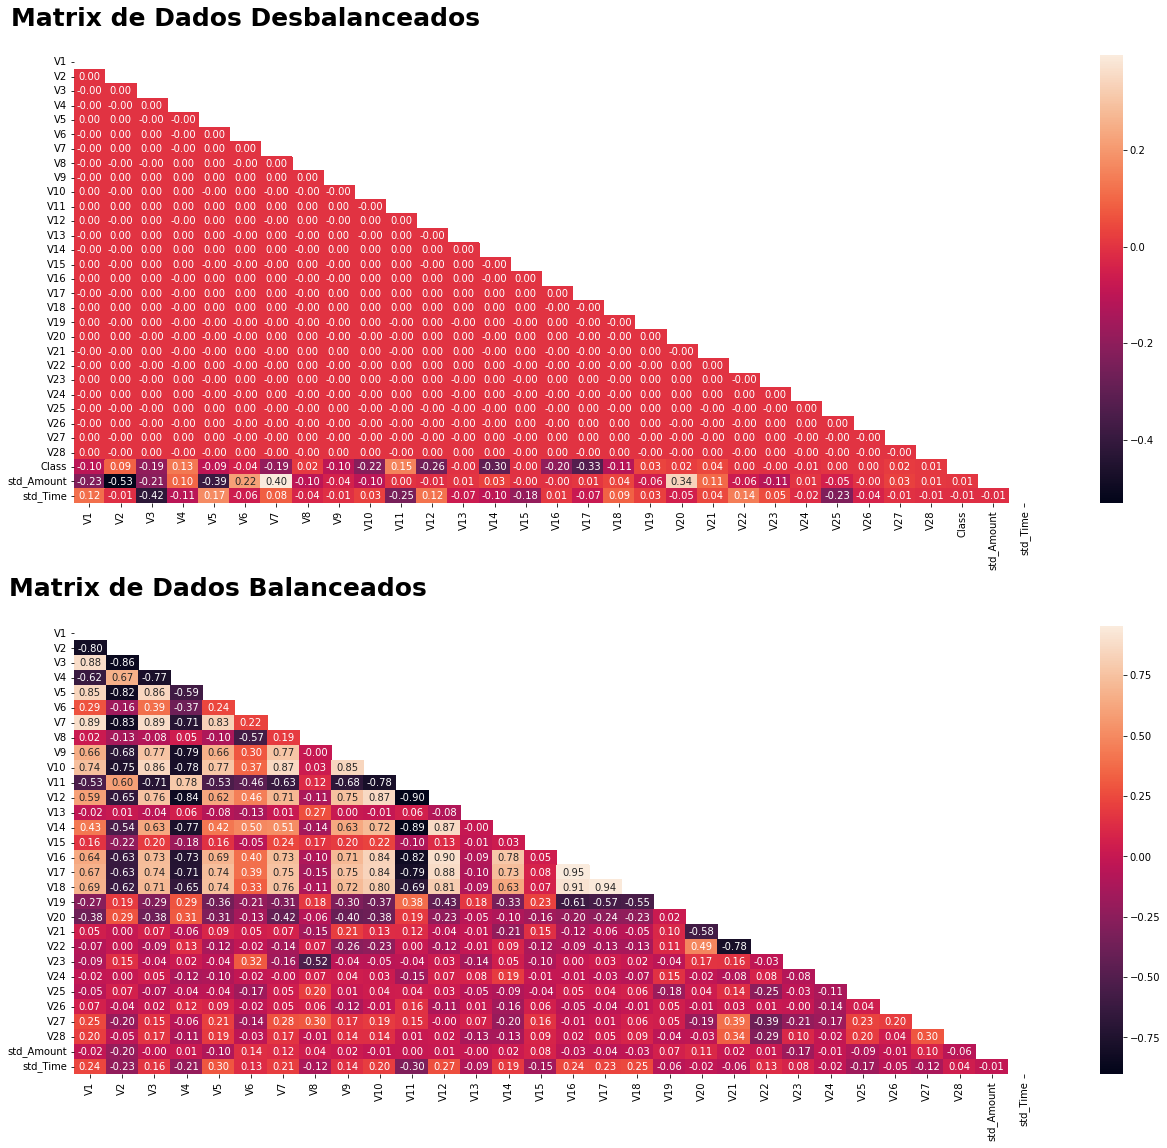

In [ ]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (18,16))

# matrix dos dados totais 
correlation = df_clean.corr()
matrix = np.triu(correlation)
sns.heatmap(correlation, annot = True, fmt = '.2f', mask = matrix, ax=ax[0] )
ax[0].text(-2 ,-2 ,'Matrix de Dados Desbalanceados', fontsize=25, fontweight='bold')

# matrix dos dados normatizados 
correlation_normalazied= pd.DataFrame(X_resampled).corr()
matrix = np.triu(correlation_normalazied)
sns.heatmap(correlation_normalazied, annot = True, fmt='.2f', mask = matrix, ax =ax[1])
ax[1].text(-2 , -2 ,'Matrix de Dados Balanceados', fontsize=25, fontweight='bold')

fig.tight_layout()

## Modelo de Machine Learning



Com os dados preparados podemos realizar o treino do modelo, essa é uma etapa relativamente simples. É necesário primeiramente instanciar o modelo, e posteriormente utilizar o metodo fit passar o dados já separados no passo anterior.

Nessa etapa será utilizado, Regessão Linear com os hyperparametros padronizados.

In [ ]:
#Instanciar e escolher os hyperparameters
model = LogisticRegression()

#Fit do modelo (treinar)
model.fit(X_resampled, y_resampled)



LogisticRegression()

In [ ]:
#Aplicando o modelo
y_pred = model.predict(X_test)

## Avaliar o desempenho do modelo



Finalizado todas as etapas, falta avaliar o desempenho do modelo. Foi possivel obter uma acurácia de 96%, aplicando o treino no conjunto de teste. 

Olhando para a matrix de confusão 2443 (0,03% do total) das transações foram classificadas como normais quando na verdade eram fraudes.

In [ ]:
#métricas precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.04      0.93      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.95      0.53     71202
weighted avg       1.00      0.97      0.98     71202



In [ ]:
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Acurácia: 0.9656



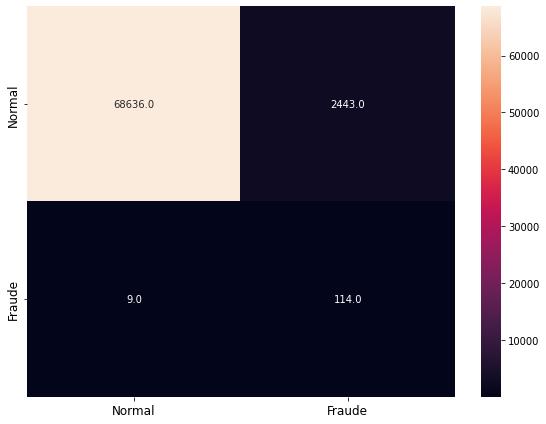

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f', ax=ax)

ax.set_xticklabels(labels=['Normal', 'Fraude'], fontsize=12)
ax.set_yticklabels(labels=['Normal', 'Fraude'], fontsize=12)

fig.tight_layout()

###Comparativo de menos *features*

Um ponto importante para o modelo de machine learning é utilizar as *features* que possuem uma maior relevância para o problema em questão. No treino acima foi atribuida ao modelo todas as *features* possiveis. 

Na comparação a seguir, foi retirada as *features* que não apresentaram nenhuma correlação relavante na matriz com dados balanceados, desta forma foi retirado as *features* **V18** à **V28**. 

É possível observar que existe uma pequena melhora na detecção nas fraudes. O modelo classifica uma quantidade menor de transações fraudulentas classificadas como normais, que é bom, e há um pequeno aumento nas transações normais classificadas como fraudulentas, o que pode ser bom também até um certo limite, ajuda evitar transtornos com cliente que poderia vir a ter seu cartão bloqueado. 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.06      0.91      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.98     71202

Acurácia: 0.9734



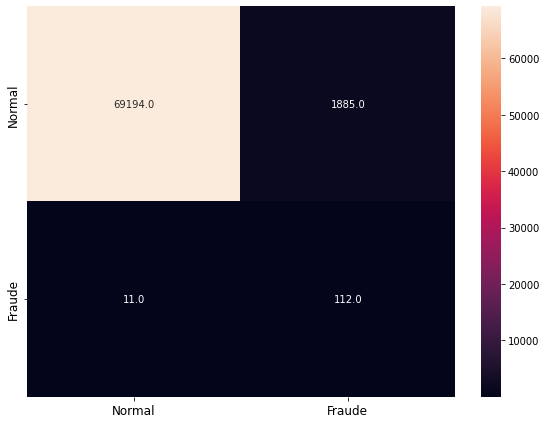

In [ ]:
#Criação da variável 
df_compa = df_clean.copy()
df_compa.drop(['V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V24', 'V25', 'V26', 'V27', 'V28']  , axis = 1, inplace = True )

#separação dos dados
X1= df_compa.drop('Class', axis = 1)
y1 = df_compa['Class']

#separação entre treino e teste
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1 , stratify = y1)

#balanceamento das classes
rus = RandomUnderSampler()
X1_resampled, y1_resampled =  rus.fit_resample(X1_train, y1_train)

#instanceando modelo 
model = LogisticRegression()

#Fit do modelo (treinar)
model.fit(X1_resampled, y1_resampled)

#treino do modelo
y1_pred = model.predict(X1_test)

#métrica de relátorio
print(classification_report(y1_test, y1_pred))

fig, ax = plt.subplots(figsize=(8,6))

print("Acurácia: {:.4f}\n".format(accuracy_score(y1_test, y1_pred)))

sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt='.1f', ax=ax)

ax.set_xticklabels(labels=['Normal', 'Fraude'], fontsize=12)
ax.set_yticklabels(labels=['Normal', 'Fraude'], fontsize=12)

fig.tight_layout()

## Conclusão

No projeto em questão fica evidente a necessidade de ter alguns cuidados com dados antes de irmos diretamente para o modelo de machine learning. É de suma importância, nos atentarmos com distribuições dos dados, balanceamento das classes e presença de outliers. 

Para etapa de preparação é importante realizar etapas de normatização, para que os dados estejam em escalas similares, bem como é necessário escolher melhor método para realizar o balanceamento das classes, a fim de evitar um possível inves no resultado do nosso modelo.

Quanto ao treino, foi realizado com o modelo de Regressão Linear. O resultado foi satisfatório, retornando acurácia de 96%, na matrix de confusão vemos que o modelo tem um bom percetual de reconhecimento das transações classificadas como fraudulentas. Quando selecionamos apenas algumas *features*, as que apresentaram correlações mais expressivas quando balanceadas, para usar no modelo, houve uma pequena melhora na performace. Essa último passo, demostrar a necessidade também de identificarmos as melhores *features* para o problema que estamos analisando. 